In [11]:
pip install apyori

In [12]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Order1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [15]:
print('Shape of data is : ',data.shape)

Shape of data is :  (38765, 3)


In [16]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [17]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [19]:
transaction = data.groupby(['Member_number', 'Date'])
transaction.count()

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [20]:
transaction

In [21]:
support = (data['itemDescription'].value_counts()/14963*100)
support.head()

whole milk          16.721246
other vegetables    12.684622
rolls/buns          11.468288
soda                10.118292
yogurt               8.915324
Name: itemDescription, dtype: float64

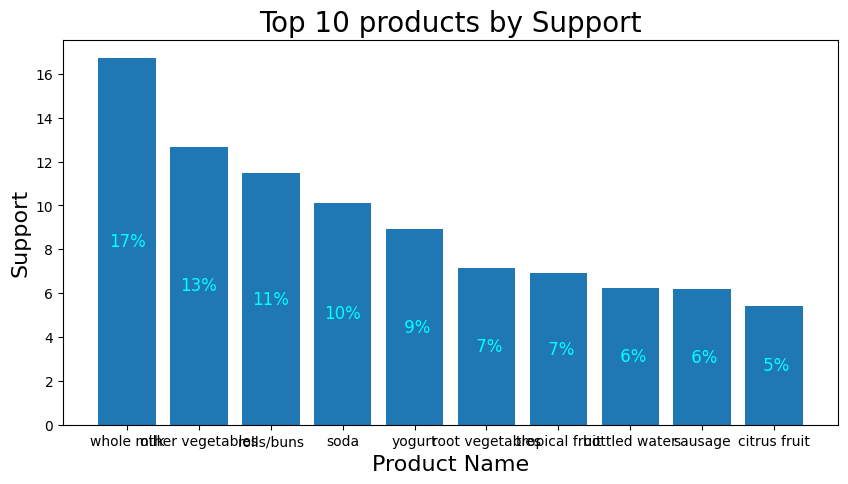

In [23]:
plt.figure(figsize=(10, 5))
bars = plt.bar(x = np.arange(len(support.head(10))), height = (support).head(10))
plt.bar_label(bars, fontsize=12, color='cyan', fmt = '%2.lf%%', label_type='center')
plt.xticks(ticks = np.arange(len(support.head(10))), labels=support.index[:10])
plt.title('Top 10 products by Support', fontsize=20)
plt.xlabel('Product Name', fontsize=16)
plt.ylabel('Support', fontsize=16)
plt.show()


In [26]:
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transaction)]
list_transactions[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [33]:
rules = apriori(list_transactions, min_support=0.001, min_confidence=0.05, min_lift = 1.2, max_length = 2)
result = list(rules)

In [34]:
print(len(result))

28


In [35]:
for item in result:
  pair = item[0]
  print(pair)
  items = [x for x in pair]
  print('Rule ' + items[0] + '-> ' + items[1])
  print('Support : ' + str(item[1]))
  print('Confidence : ' + str(item[2][0][2]))
  print('Lift : ' + str(item[2][0][3]))
  print('_______________________________________')

frozenset({'beverages', 'sausage'})
Rule beverages-> sausage
Support : 0.0015371249081066632
Confidence : 0.09274193548387098
Lift : 1.5367636551995143
_______________________________________
frozenset({'bottled beer', 'sausage'})
Rule bottled beer-> sausage
Support : 0.003341575887188398
Confidence : 0.07374631268436578
Lift : 1.2220000849348451
_______________________________________
frozenset({'sugar', 'bottled water'})
Rule sugar-> bottled water
Support : 0.0014702933903628951
Confidence : 0.0830188679245283
Lift : 1.368074141800349
_______________________________________
frozenset({'brown bread', 'canned beer'})
Rule brown bread-> canned beer
Support : 0.0024059346387756467
Confidence : 0.06394316163410303
Lift : 1.3629366489046777
_______________________________________
frozenset({'citrus fruit', 'candy'})
Rule citrus fruit-> candy
Support : 0.0010024727661565194
Confidence : 0.06976744186046512
Lift : 1.3131197893813076
_______________________________________
frozenset({'white b